<a href="https://colab.research.google.com/github/HishitaGupta/Colab-Notebooks/blob/main/XRay_Image_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# This will prompt you to authorize access
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
zip_path = '/content/drive/My Drive/Hishita Colab/chest_xray-20250726T110654Z-1-001.zip'


In [3]:
import zipfile
import os

# Choose a directory to extract
extract_dir = '/content/xray_images'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)


Files extracted to: /content/xray_images


In [4]:
import os

# List first 10 files
print(os.listdir('/content/xray_images/chest_xray/test/NORMAL')[:10])


['IM-0011-0001-0001.jpeg', 'IM-0103-0001.jpeg', 'NORMAL2-IM-0130-0001.jpeg', 'IM-0045-0001.jpeg', 'IM-0071-0001.jpeg', 'IM-0033-0001-0001.jpeg', 'NORMAL2-IM-0309-0001.jpeg', 'NORMAL2-IM-0198-0001.jpeg', 'IM-0083-0001.jpeg', 'NORMAL2-IM-0199-0001.jpeg']


In [5]:
Datadir ='/content/xray_images/chest_xray/train'

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [7]:
# initialising categories of classification
CATEGORIES =["NORMAL","PNEUMONIA"]

In [8]:
# Converting images to grayscale
for i in CATEGORIES:
  path = os.path.join(Datadir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    # plt.imshow(img_array,cmap='gray')
    # plt.show()
  #   break
  # break

In [9]:
# Initialising the size of the image so that every image is in same dimension
img_size= 100

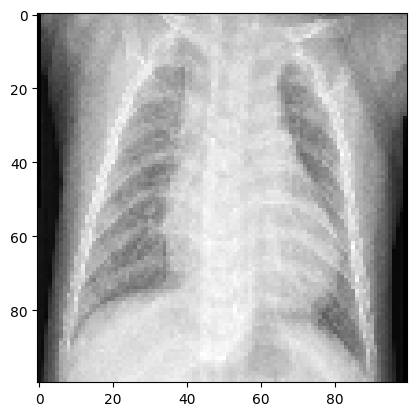

In [10]:
# image after resize and grayscale
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

array([[  0,  81,  99, ..., 112, 108, 111],
       [  0,  89, 102, ..., 118, 108, 129],
       [  0,  91,  96, ..., 128, 130, 133],
       ...,
       [ 15,  30,  57, ...,   9,  12,   0],
       [ 14,  31,  65, ...,  10,  12,   0],
       [ 14,  36,  60, ...,   9,  12,   0]], dtype=uint8)
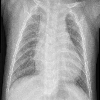

In [11]:
new_array


In [12]:
training_data =[]

In [13]:
# defining the function for training data according to thr categories converting the images ot grayscale with resizing the image into 100X100

# converting it to numpy arrays

def create_training_data():
  for i in CATEGORIES:

    path = os.path.join(Datadir,i)
    class_num = CATEGORIES.index(i)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array, class_num])

      except Exception as e:
        pass

In [14]:
create_training_data()

In [15]:
print(len(training_data))

5226


In [16]:
training_data

[[array([[ 0,  0,  0, ..., 87, 89, 83],
         [ 0,  1,  0, ..., 86, 84, 81],
         [ 1,  0,  0, ..., 85, 89, 75],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  0],
 [array([[37, 35, 40, ..., 19, 10,  2],
         [35, 46, 40, ..., 10,  3,  0],
         [42, 45, 44, ..., 10,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  0],
 [array([[30, 56, 77, ..., 73, 46, 26],
         [20, 48, 70, ..., 70, 42, 18],
         [11, 41, 67, ..., 65, 37, 16],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  0],
 [array([[ 25,  24,  19, ..., 161, 155,  94],
         [ 33,  33,  30, ..., 182,  97,  91],
         [ 43,  42,  39, ..., 105,  99,  93],
         ...,
         [  0,   0,   0

In [17]:
X =[]
y=[]

In [18]:
# splitting the features and labels
for features,label in training_data:
  X.append(features)
  y.append(label)

In [19]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[ 0]
   [ 0]
   [ 0]
   ...
   [87]
   [89]
   [83]]

  [[ 0]
   [ 1]
   [ 0]
   ...
   [86]
   [84]
   [81]]

  [[ 1]
   [ 0]
   [ 0]
   ...
   [85]
   [89]
   [75]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [20]:
y = np.array(y)

In [21]:
# reshaping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [22]:
# as we do for training data similarly doing with validation data
validation_data =[]
Datadir_val ='/content/xray_images/chest_xray/test'

In [23]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(Datadir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [24]:
create_validating_data()

In [25]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[205,  72,  73, ...,  83,  44,  59],
       [211,  79,  77, ...,  90,  41,  65],
       [207,  79,  78, ...,  70,  32,  83],
       ...,
       [ 16,  13,  34, ...,  18,  19,  18],
       [ 16,  13,  37, ...,  18,  19,  19],
       [ 16,  11,  40, ...,  18,  18,  19]], dtype=uint8), 1]
[array([[148, 125, 123, ..., 118,  73,  67],
       [133, 121, 124, ...,  49,  69,  68],
       [163, 148, 113, ...,  50,  62,  66],
       ...,
       [  0,   0,   0, ...,  29,   5,   0],
       [  0,   0,   0, ...,  29,   6,   0],
       [  0,   0,   0, ...,  32,   9,   0]], dtype=uint8), 0]
[array([[  0,   0, 254, ...,   2,   2,   3],
       [  0,   0, 254, ...,   0,   0,   0],
       [  0,   0, 249, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 55,  66,  77, ..., 122, 154,  97],
       [ 70,  65,  77, ..., 130, 191, 116],
       [ 67,  85,  80, ...

In [26]:
X_val=[]
y_val=[]

In [27]:
for features,label in validation_data:
  X_val.append(features)
  y_val.append(label)

In [28]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)

In [29]:
# Importing the library for training the model and adding the neuron network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


In [30]:
# Pixel value ranges from 0 to 255, 0 means black , 255 means white
# In order to scale it down to scale of 0 to 1, we are performing this step

X =np.array(X/255.0)
x_val =np.array(X_val/255.0)

In [31]:
X.shape

(5226, 100, 100, 1)

In [32]:
x_val.shape

(624, 100, 100, 1)

In [33]:
# initialising the neural network layer for training the model

model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) # 64 filters
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1)) # beccause binary classification
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
# fitting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4, epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8340 - loss: 0.4053 - val_accuracy: 0.8013 - val_loss: 0.4625
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9429 - loss: 0.1597 - val_accuracy: 0.7724 - val_loss: 0.7402
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9600 - loss: 0.1071 - val_accuracy: 0.7436 - val_loss: 0.8669
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9647 - loss: 0.0898 - val_accuracy: 0.7500 - val_loss: 0.9506
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9672 - loss: 0.0861 - val_accuracy: 0.7067 - val_loss: 1.2473
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9714 - loss: 0.0786 - val_accuracy: 0.7179 - val_loss: 1.0915
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9723 - loss: 0.0751 - val_accuracy: 0.7740 - val_loss: 1.1555
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9764 - loss: 0.0649 -

In [37]:
# saving the model
model.save(r"/content/drive/MyDrive/Hishita Colab/X-Ray Image Classification/chest_xray/model_first.h5")

In [38]:
# importing the library for tesiting the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [39]:
CATEGORIES =['NORMAL','PNEUMONIA']

In [40]:
def prepare(image):
  img_size =100
  img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size =(img_size,img_size))
  new_array = tf.keras.preprocessing.image.img_to_array(img)

  return new_array.reshape(-1,img_size,img_size,1)

In [41]:
model = tf.keras.models.load_model("/content/drive/My Drive/Hishita Colab/X-Ray Image Classification/chest_xray/model_first.h5")

In [42]:
image = r'/content/xray_images/chest_xray/test/NORMAL/IM-0059-0001.jpeg'

In [43]:
prediction = model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
[[0.0023908]]
0
NORMAL


In [44]:
image2 = r'/content/xray_images/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'

In [45]:
prediction = model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.99992764]]
1
PNEUMONIA


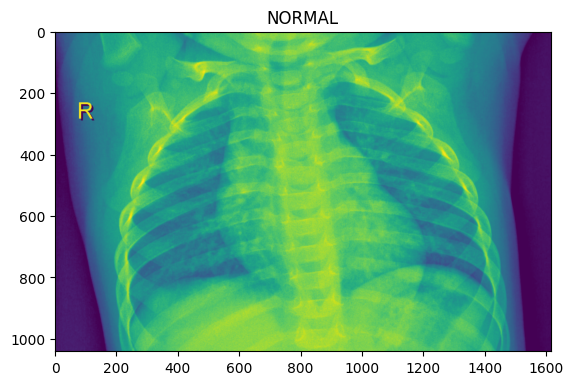

In [46]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

## **Using Pre Trained Models**

In [47]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [51]:
# define img_Size

img_size = 100

# load the pre trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top = False, weights='imagenet')

# freeze the layers of pretrained model
for layer in base_model.layers:
  layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense (128, activation ='relu')(x)
x = Dense(64, activation='relu')(x)

predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs =base_model.input,outputs =predictions)

# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# define the image generators for training and validation set
train_datagen = ImageDataGenerator(rescale=1./255, shear_range =0.2,zoom_range=0.2, horizontal_flip =True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir ='/content/xray_images/chest_xray/train'
val_dir ='/content/xray_images/chest_xray/test'

# create the image generators for training and valiation data
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size, img_size), batch_size =32, class_mode ='binary')
val_generator = train_datagen.flow_from_directory(val_dir,target_size=(img_size, img_size), batch_size =32, class_mode ='binary')

# train the model
model.fit(train_generator, epochs=10, validation_data = val_generator)

# Evaluate the model on test data
test_dir = '/content/xray_images/chest_xray/test'
test_datagen = ImageDataGenerator(rescale =1./255)
test_generator =test_datagen.flow_from_directory(test_dir,target_size=(img_size, img_size), batch_size =32, class_mode ='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 426ms/step - accuracy: 0.8831 - loss: 0.2788 - val_accuracy: 0.8766 - val_loss: 0.3652
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 64s 393ms/step - accuracy: 0.9370 - loss: 0.1643 - val_accuracy: 0.7981 - val_loss: 0.7078
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 66s 405ms/step - accuracy: 0.9531 - loss: 0.1346 - val_accuracy: 0.8862 - val_loss: 0.3151
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 65s 393ms/step - accuracy: 0.9531 - loss: 0.1292 - val_accuracy: 0.8622 - val_loss: 0.3897
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 63s 384ms/step - accuracy: 0.9562 - loss: 0.1257 - val_accuracy: 0.8766 - val_loss: 0.3540
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 64s 387ms/step - accuracy: 0.9547 - loss: 0.1181 - val_accuracy: 0.8670 - val_loss: 0.3983
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 64s 390ms/step - accuracy: 0.9527 - loss: 0.1208 - val_accuracy: 0.8526 - val_loss: 0.5016
